### Homework
1) Write your own function to compute the **confusion matrix** and the **diagonal** with the classification scores for each class.

In [1]:
def compute_confusion_matrix(test_y, pred_y):
  classes = np.unique(test_y)
  confmat = np.zeros((len(classes), len(classes)))
  for i in range(len(classes)):
    for j in range(len(classes)):
       confmat[i, j] = np.sum((test_y == classes[i]) & (pred_y == classes[j]))

  return confmat, (confmat.diagonal() / confmat.sum(axis=1))

2) Download the CIFAR 10 dataset from Virtuale (`CIFAR-10-simple.zip`).
Load the dataset and the classes, try to solve the classification problem. You can use only the data provided in the `train` folder to train your model.
Compute the final accuracy with the folder `test`.

CIFAR 10 (https://www.cs.toronto.edu/~kriz/cifar.html) consists in **32x32 colour images** (RGB) divided in **10 classes**. There are **300 samples in training** and **50 testing samples** for each class.

Upload your result (`results.txt`) on Virtuale, including the classifier(s) and features used. The student with best accuracy will present his/her solution in the next lecture!


In [24]:
import time
import os
import sklearn
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from glob import glob
from os.path import join
import cv2
from skimage.feature import hog, local_binary_pattern
from tqdm import tqdm

In [3]:
np.random.seed(1821)

Load data

In [4]:
!unzip -q CIFAR-10-simple.zip -d /content

In [99]:
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance

In [111]:
dataset_path_test = '/content/CIFAR-10-simple/test'
dataset_path_train = '/content/CIFAR-10-simple/train'

test_set = glob(join(dataset_path_test, '*', '*.jpg'))
train_set = glob(join(dataset_path_train, '*', '*.jpg'))

print('Test set: ', len(test_set))
print('Train set: ', len(train_set))

/content/CIFAR-10-simple/train/deer/0010.jpg
/content/CIFAR-10-simple/train/dog/0206.jpg
/content/CIFAR-10-simple/train/bird/0112.jpg
Test set:  500
Train set:  3000


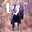

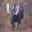

In [146]:
prova = train_set[100]

img = cv2.imread(prova)

alpha = 2 # Contrast control (1.0-3.0)
beta = -80 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
cv2_imshow(adjusted)

diff = cv2.imread(prova)
cv2_imshow(diff)
# cv2.imwrite('contrast_board.jpg', adapt_thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Labels:
- Airplane: 0
- Automobile: 1
- Bird: 2
- Cat: 3
- Deer: 4
- Dog: 5
- Frog: 6
- Horse: 7
- Ship: 8
- Truck 9

In [6]:
def get_labels(image):
  if 'airplane' in image:
    return 0
  elif 'automobile' in image:
    return 1
  elif 'bird' in image:
    return 2
  elif 'cat' in image:
    return 3
  elif 'deer' in image:
    return 4
  elif 'dog' in image:
    return 5
  elif 'frog' in image:
    return 6
  elif 'horse' in image:
    return 7
  elif 'ship' in image:
    return 8
  elif 'truck' in image:
    return 9
  else:
    raise NotImplementedError('Not existing class!')

Extract Features with BW images

In [ ]:
def extract_features(images, feat_type, img_size):

    labels = []
    features = []

    for image in tqdm(images):

        # open the image
        img = cv2.imread(image, 0)

        # resize the image
        img = cv2.resize(img, (img_size, img_size))

        # compute the features
        if feat_type == 'hog':
            feat = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        elif feat_type == 'lbp':
            feat = np.ravel(local_binary_pattern(img, P=100, R=5))
        elif feat_type == 'img':
            img = img / 256.0
            feat = np.ravel(img)
        else:
            raise NotImplementedError('Not implemented feature!')

        # append features and labels
        features.append(feat)
        labels.append(get_labels(image))

    return features, labels

### Sample Distribution:
- Train: 76%
- Test: 14%
- Validation: 10%


In [82]:
np.random.shuffle(test_set)
np.random.shuffle(train_set)
trainset = train_set[350:]
valset = train_set[0:350]
testset = test_set
print('Total: {} splitted in Train: {}, Val: {} and Test: {}'.format(len(train_set) + len(test_set), len(trainset), len(valset), len(testset)))

Total: 3500 splitted in Train: 2650, Val: 350 and Test: 500


In [83]:
size = [
    32,
    64,
    128
]

features = [
    'hog',
    'lbp',
    'img'
]

for size in size:
  for feature in features:
    t1 = time.time()
    train_x, train_y = extract_features(trainset, feature, size)
    val_x, val_y = extract_features(valset, feature, size)
    test_x, test_y = extract_features(testset, feature, size)
    clf = svm.SVC(gamma=0.001, C=100., kernel='rbf', verbose=False)
    clf.fit(train_x, train_y)
    clf.score(val_x, val_y)
    y_pred = clf.predict(test_x)
    t2 = time.time()
    print()
    print('Final Accuracy {} {}: {:.3f} - Elapsed Time: {}'.format((feature),(size),(accuracy_score(test_y, y_pred)),(t2 - t1)))
    print()

NameError: ignored

HOG seems to be the most accurate feature descriptor (compared to LBP and np.ravel), therefore, we will check the accuracy of HOG using different classifiers:

- SVC
- Random Forest
- Ada Boost
- Decision Tree
- Quadratic Discrimination

In [90]:
#from PIL import Image, ImageEnhance

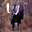

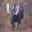

In [154]:
prova = train_set[100]

img = cv2.imread(prova)

alpha = 1.5 # Contrast control (1.0-3.0)
beta = -80 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
cv2_imshow(adjusted)

diff = cv2.imread(prova)
cv2_imshow(diff)
# cv2.imwrite('contrast_board.jpg', adapt_thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

To achieve a higher accuracy, the **contrast** of each image has been improved by 1.5 while **brightness** has been diminished by -80.

It seems that BGR images achieve a higher accuracy compared to BW images (with modified contrast and brightness).

In [149]:
def apply_hog(images, img_size):

    labels = []
    features = []

    for image in (images):

        img_init = cv2.imread(image) #(image, 0) -> bw

        alpha = 1.5 # Contrast control (1.0-3.0)
        beta = -80 # Brightness control (0-100)

        adjusted = cv2.convertScaleAbs(img_init, alpha=alpha, beta=beta)

        # open the image
        # img = cv2.imread(image, 0)

        # resize the image
        img = cv2.resize(adjusted, (img_size, img_size))

        # increase contrast
        # img2 = ImageEnhance.Contrast(img)

        # compute the feature
        feat = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)

        # append features and labels
        features.append(feat)
        labels.append(get_labels(image))

    return features, labels

In [86]:
from numpy.core.arrayprint import format_float_scientific
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [152]:
size = [
    32,
    64,
    128
]

names = [
    "SVC",
    "Random Forest",
    "Ada Boost",
    "Decision Tree",
    "Quadratic Discrimination"
]

classifiers = [
    svm.SVC(gamma=0.001, C=100., kernel='rbf', verbose=False, probability=False),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    QuadraticDiscriminantAnalysis()
]

for size in size:
  for name, clf in zip(names, classifiers):
    t1 = time.time()
    train_x, train_y = apply_hog(trainset, size)
    val_x, val_y = apply_hog(valset, size)
    test_x, test_y = apply_hog(testset, size)
    clf.fit(train_x, train_y)
    clf.score(val_x, val_y)
    y_pred = clf.predict(test_x)
    t2 = time.time()
    print()
    print('Elapsed Time: {}'.format((t2 - t1)))
    print('Final accuracy: {} {}, {:.3f}'.format((name),(size),(accuracy_score(test_y, y_pred))))   
    print()


Elapsed Time: 5.32557225227356
Final accuracy: SVC 32, 0.412


Elapsed Time: 3.2331478595733643
Final accuracy: Random Forest 32, 0.274


Elapsed Time: 9.675410985946655
Final accuracy: Ada Boost 32, 0.290


Elapsed Time: 4.276067018508911
Final accuracy: Decision Tree 32, 0.200



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Elapsed Time: 3.5812225341796875
Final accuracy: Quadratic Discrimination 32, 0.120


Elapsed Time: 18.77253818511963
Final accuracy: SVC 64, 0.414


Elapsed Time: 9.988600254058838
Final accuracy: Random Forest 64, 0.246



KeyboardInterrupt: ignored

The **Decision Tree** classifier and the **Quadratic Discrimination** classifier provide the lowest accuracy score.

On the other hand, **SVC** is the most accurate, followed by **Ada Boost** and **Random Forest**.

Now, we will try to optimize these classifiers:

In [151]:
clf = svm.SVC(gamma='scale', C=100., kernel='rbf', verbose=False, probability=False)
size = [32, 64, 128]

for size in size:
  t1 = time.time()
  train_x, train_y = apply_hog(trainset, size)
  val_x, val_y = apply_hog(valset, size)
  test_x, test_y = apply_hog(testset, size)
  clf.fit(train_x, train_y)
  clf.score(val_x, val_y)
  y_pred = clf.predict(test_x)
  t2 = time.time()
  print()
  print('Elapsed Time: {}'.format((t2 - t1)))
  print('Final accuracy: {} {}, {:.3f}'.format((name),(size),(accuracy_score(test_y, y_pred))))   
  print()


Elapsed Time: 5.862117290496826
Final accuracy: SVC 32, 0.478


Elapsed Time: 23.638479232788086
Final accuracy: SVC 64, 0.486


Elapsed Time: 129.62877583503723
Final accuracy: SVC 128, 0.440

